- tree model
    - feature variable을 임의적으로 설정

- random forest
    - tree를 average = ensemble
    
- bagging: Bootstrap Aggregation
    - random sampling with refreshment
    - ex) 구슬을 주머니에서 꺼내고 다시 집어넣어서 꺼내는 확률과정
    - 어떤 값을 구할때 모의 실험을 통해 결과값을 도출한 후 결과값을 평균냄

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image

In [52]:
# grammer: voting classifier
'''
from skleanr.ensemble import VotingClassifier
VotingClassifier(estimators=[('ex1', clf_ex1), ('ex2', clf_ex2)])
'''

"\nfrom skleanr.ensemble import VotingClassifier\nVotingClassifier(estimators=[('ex1', clf_ex1), ('ex2', clf_ex2)])\n"

- Ensemble: average of ML model's predictors
 - 'public wisdom is better than a single expert'

- Random forest: Ensemble of the decision tree model 

- Ensemble methodology: bagging, boosting, and stacking (etcs)
    - averaging method!!!

## Voting Classifier 

- Suppose you have a couple ML algorithms whose accuracy scores are higher than 80%
- **Hard voting**: predict with _majority voting_
  - to predict with most voting classifier, then it's performance is better than a single classifier

- **Soft voting**: predict_probability
  - to predict the class with the highest class probability, averaged over all the individual classifiers.

- Example:Ensemble's prediction **1** with hard voting
    - Algo1:{1 $\succ$ 2} <br>
    - Algo2:{1 $\succ$ 2}  <br>
    - Algo3:{1 $\prec$ 2}  <br>
    - Algo4:{1 $\succ$ 2}  <br>
    
- Example:Ensemble's prediction **2** with soft voting
    - Algo1:{P(1)=0.6, P(2)=0.4} <br>
    - Algo2:{P(1)=0.55, P(2)=0.45}  <br>
    - Algo3:{P(1)=0.1, P(2)=0.9}   ## 2번이 옳다고 확신하는 중 <br> 
    - Algo4:{P(1)=0.51, P(2)=0.49}  <br>    
        $\Longrightarrow P^{average}(1)=0.44, P^{average}(2)=0.56  $
  
- RF = hardvoting softvoting을 구분할 수 있다 

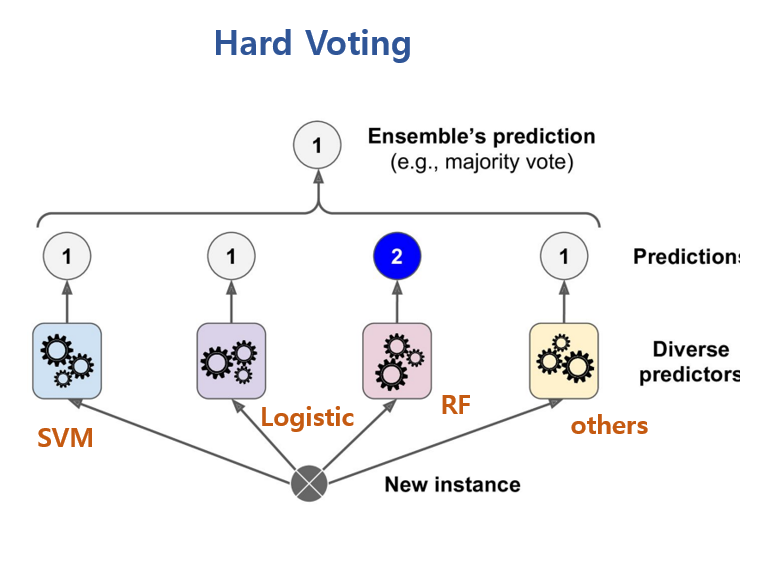

In [28]:
Image("c:/python/images/HAR.PNG", width=600, height=200)

- binomial distribution
- log large numbers
    - 불량을 모으면 트리플A
    - 불량신용자 전부가 망할 확률은 없다,,,,

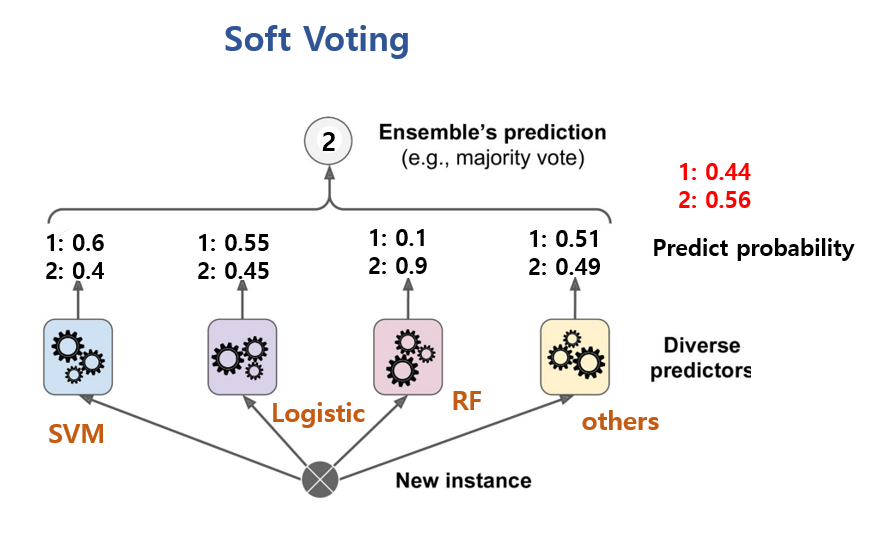

In [29]:
Image("c:/python/images/SOFTVOTING.PNG", width=600, height=200) 

### why soft voting is performing well than soft voting?

- suppose you have a couple of ML algorithms predicting probabilities with 51% (merely more than random walk)
- If doing soft voting, what is the probability of greater than 50% with 1000 prediction? (binomial distribution)
\begin{align*}
P(X \ge 501) &= \sum_{k=501}^{N} {{N}\choose{k}}p^k (1-p)^{n-k} \\
             &= \sum_{k=501}^{1000} {{1000}\choose{k}}(0.51)^k (0.49)^{n-k} \\
             & = 0.726
\end{align*}

- for 10000 experiments, the probability is **0.977**

- "you build an ensemble containing 1,000 classifiers that are individually 
   correct only 51% of the time (barely better than random guessing). 
   If you predict the majority voted class, you can hope for up to 75% accuracy!"
   - pre-condition: if all classifiers are independent

In [36]:
from scipy.stats import binom

n = 1000
p = 0.51

r = binom(n, p)
sum = 0

for i in range(501, 1000):
    sum += r.pmf(i)

print(sum)

0.7260985557309101


## Voting Classfier empirical example: SVC, Random Forest, Logistic

In [147]:
# data 

from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise =0.6, random_state=133)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [148]:
# import voting model and MLs

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

In [149]:
# generate instances: hard voting

clf_log = LogisticRegression(solver='liblinear', random_state=133)
clf_svc = SVC(gamma='auto', random_state=133)
clf_rf = RandomForestClassifier(n_estimators=10, random_state=133)

In [150]:
clf_voting = VotingClassifier(estimators = [('log', clf_log), ('svc', clf_svc), ('rf', clf_rf)],
                               voting = 'hard')

In [151]:
clf_voting.fit(Xtrain, ytrain)
yhat = clf_voting.predict(Xtest)

In [152]:
for model in (clf_log, clf_svc, clf_rf, clf_voting):
    model.fit(Xtrain, ytrain)
    y_predict = model.predict(Xtest)
    print(model.__class__.__name__, ':',  accuracy_score(y_predict, ytest))

LogisticRegression : 0.788
SVC : 0.796
RandomForestClassifier : 0.78
VotingClassifier : 0.796


In [153]:
# generate instances: soft voting

clf_log = LogisticRegression(solver='liblinear', random_state=133)
clf_svcP = SVC(gamma='auto', probability=True, random_state=133)
clf_rf = RandomForestClassifier(n_estimators=10, random_state=133)

In [154]:
clf_votingP = VotingClassifier(estimators = [('log',clf_log), ('svcP',clf_svcP), ('rf',clf_rf)],
                               voting='soft')

In [155]:
clf_votingP.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=133, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svcP', SVC(C...timators=10, n_jobs=1,
            oob_score=False, random_state=133, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [156]:
for model in (clf_log, clf_svcP, clf_rf, clf_votingP):
    model.fit(Xtrain, ytrain)
    ypredict = model.predict(Xtest)
    print(accuracy_score(ypredict, ytest))

0.788
0.796
0.78
0.808


## Bagging and Pasting 

- Bagging: random sampling with replacement
- Pasting: random sampling without replacement 

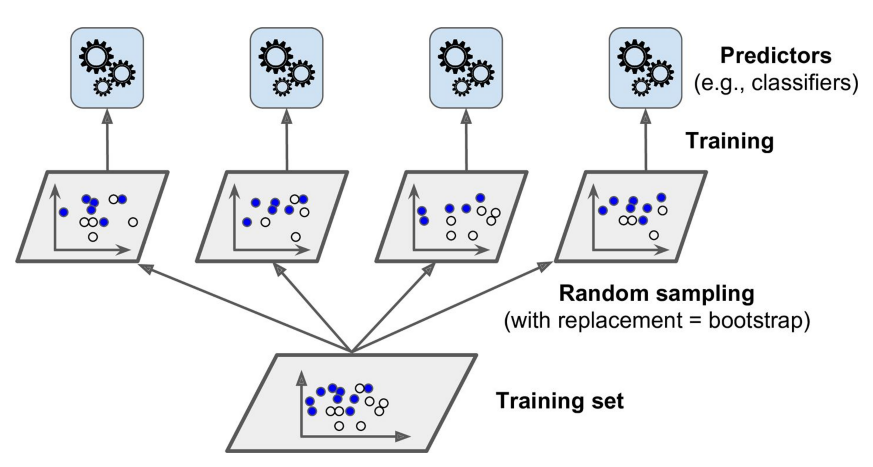

In [122]:
# Image of bagging

Image("c:/python/images/Bagging.PNG", width=600, height=200)

### Empirics: Bagging and Pasting

In [142]:
# dataset/splitting 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=1000, noise=0.6, random_state=33)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [143]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                            max_samples=100, n_jobs=-1, bootstrap=True)
     # n_estimators: number of sampling (trees in here)
     # max_samples: sample size
     # n_jobs: related to cpu
     # bootstrap: True(Bagging), False(Pasting)

In [144]:
clf_bag.fit(Xtrain, ytrain)
yhat = clf_bag.predict(Xtest)
accuracy_score(yhat, ytest)

0.764

In [145]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(Xtrain, ytrain)
yhat2 = clf_tree.predict(Xtest)
accuracy_score(yhat2, ytest)

0.708

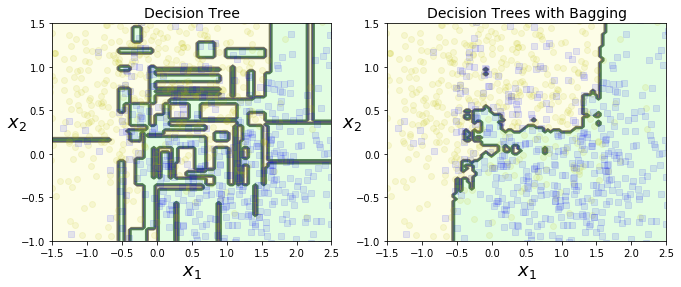

In [146]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(clf_tree, X, y, alpha=0.1)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(clf_bag, X, y, alpha=0.1)
plt.title("Decision Trees with Bagging", fontsize=14)
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [157]:
## for nonsampling estimation within BagginClassifier: see oob (out of bag) instances in chapter 7 of Geron

## Random Forest 

- Ensemble of random featuring
  - A common problem with decision trees is that they tend to fit the training data too closely (i.e., overfitting)
  - In a random forest, many decision trees are trained, but each tree only receives a bootstrapped sample
  - each node only considers a subset of features when determining the best split.
  - This forest of randomized decision trees (hence the name) votes to determine the predicted class.


- generate instances either `RandomForestClassifier` or `BaggingClassifier` <br>
  - `RandomForestClassificer(max_features, bootstrap, n_estimators, n_jobs)`
    - `max_features`: maximum number of feature in each node , default=auto($\sqrt{\#features}$) 
    - `bootstrap=True`: sample with replacement (bagging)
    - `n_estimators`: the number of trees in forest
    - `n_jobs=-1`: use all available cores

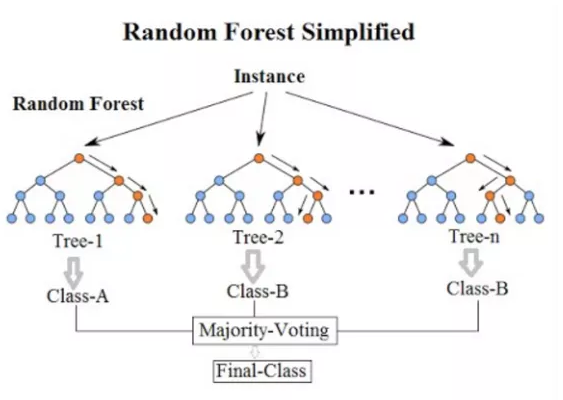

In [182]:
# simplified RF 


Image("c:/python/images/RandomForestTree2.PNG", width=600, height=200)
#from https://www.r-bloggers.com/machine-learning-basics-random-forest/

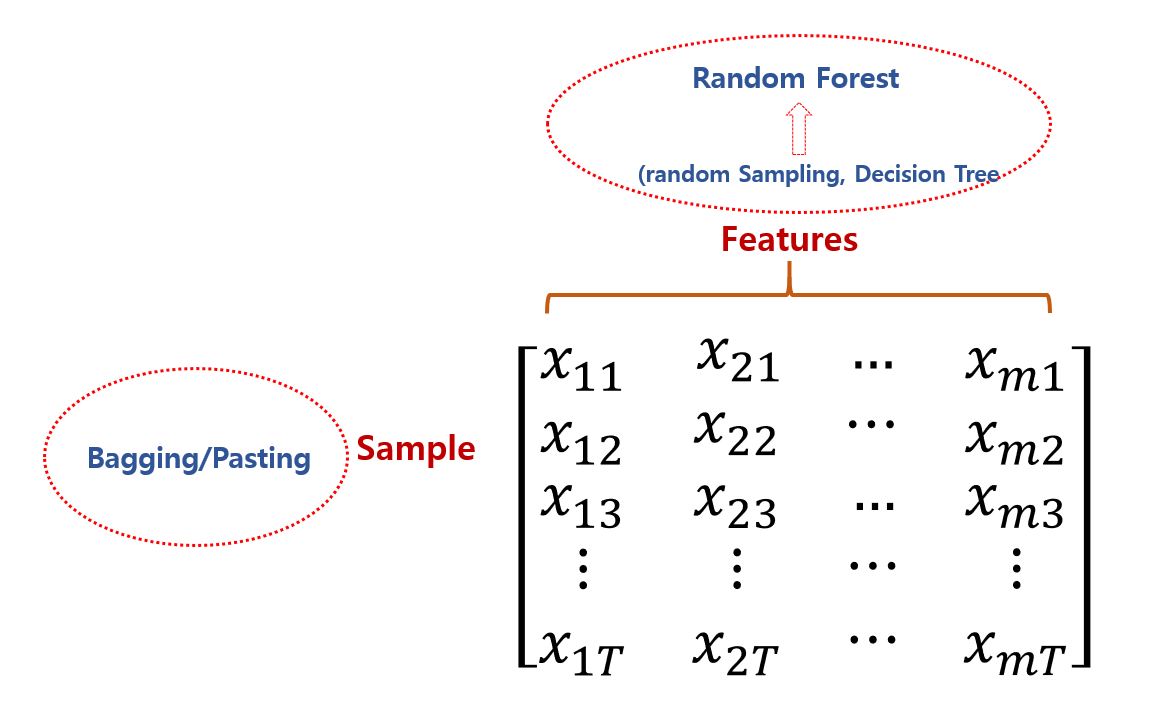

In [181]:
# difference b/w Random forest and Bagging 

Image("c:/python/images/RFvsBagging.PNG", width=600, height=200)

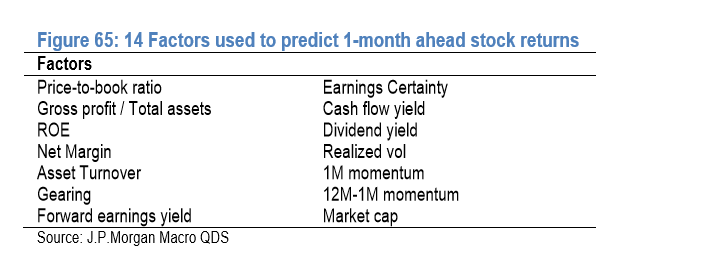

In [180]:
## Random Forest in Finance

'''
## A global stock selection model that predicts 1-month stock returns 
## across the MSCI World universe (over 2400 stocks)
## For example, using the 14 risk factors shown below. 
## We consider a subset of this universe where we have observations for all 14 factors, 
## which corresponds to about 1400 stocks
'''

Image("c:/python/images/RF_JPM.PNG")

## Empirics 

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree  import DecisionTreeClassifier

In [161]:
clf_rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
clf_rfc.fit(Xtrain, ytrain)
yhat_rfc = clf_rfc.predict(Xtest)
accuracy_score(yhat_rfc, ytest)

0.8

In [165]:
clf_bag = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes = 16), 
                            n_estimators=500, max_samples=1., bootstrap=True, n_jobs=-1 )

clf_bag.fit(Xtrain, ytrain)
yhat_bag = clf_bag.predict(Xtest)
accuracy_score(yhat_bag, ytest)

0.8

### Extra-trees (Extremely Randomized Tree)

- to make feature thresholds random rather than come from optimization took much time for computation
- pros: less time, less variance
- cons: more bias 

In [168]:
from sklearn.ensemble import ExtraTreesClassifier

clf_extra = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
clf_extra.fit(Xtrain, ytrain)
yhat_extra = clf_rfc.predict(Xtest)
accuracy_score(yhat_extra, ytest)

0.8

- "It is hard to tell in advance whether a RandomForestClassifier will perform better or worse than an ExtraTreesClassifier. "
-  "Generally, the only way to know is to try both and compare them using cross-validation (and tuning the hyperparameters using grid search)."


In [178]:
X[:3]

array([[-0.94928286,  1.52078608],
       [ 1.91678894, -1.20629083],
       [ 0.19042865,  0.53505093]])

### feature importance plotting 

- feaure selection in RF

**what is feature importance?**

\begin{align*}
FI_j = \frac{N_j}{N} \times \Big( G_j -  \frac{N_jR}{N_j}  G_R - \frac{N_jL}{N_j}  G_L\Big)
\end{align*}
- where
  - j: $j^{th}$ node
  - N: total sample size
  - $N_j$: $j^{th}$ sample size
  - $G_j$: $j^{th}$ impurity
  - $G_R$: right impurity

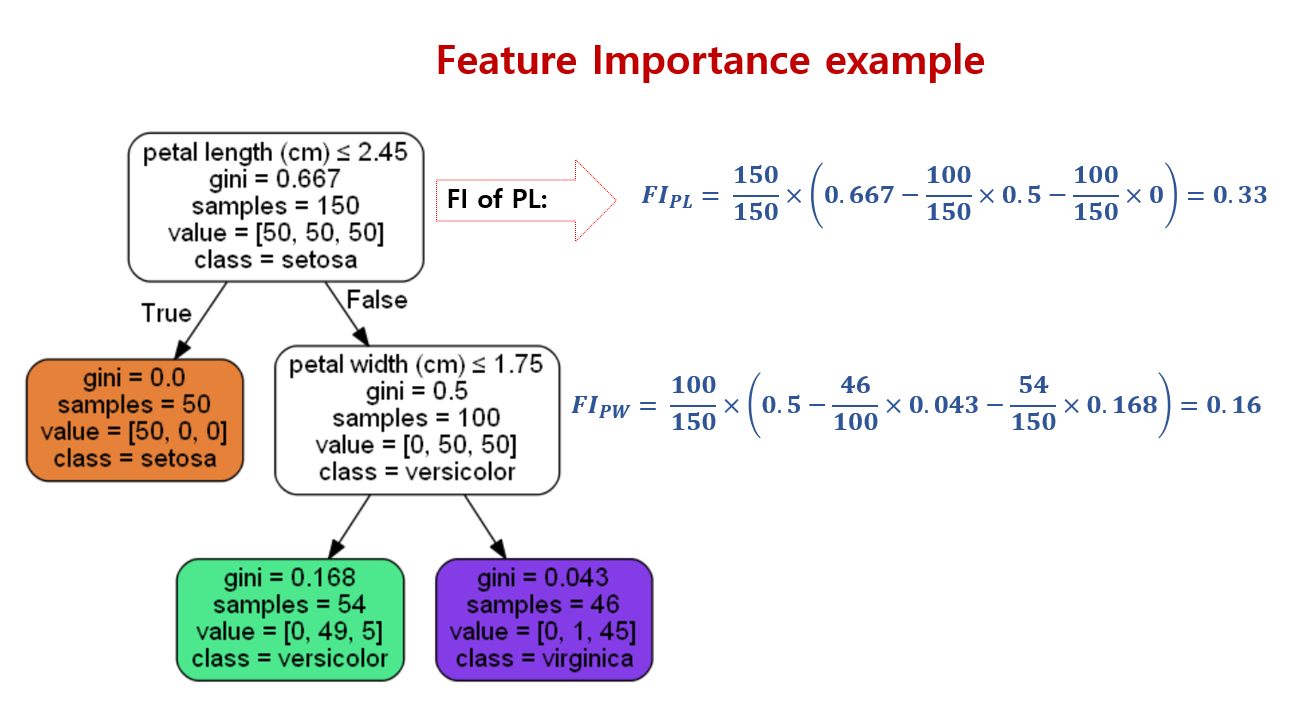

In [188]:
Image("c:/python/images/FeatureImportancExample.PNG", width=600, height=200)

In [190]:
# import library 

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X = data.data 
y = data.target
clf_rf = RandomForestClassifier()
clf_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
# get feature importance 

importances = clf_rf.feature_importances_

In [205]:
# getting names of more important features: 

index  = np.argsort(importances)[::-1]
names = [data.feature_names[i] for i in index]

Text(0.5, 1.0, 'Feature importances')

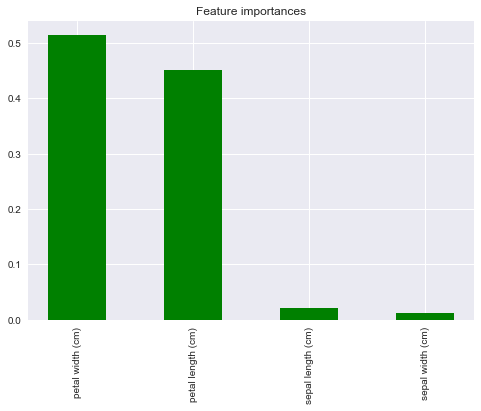

In [229]:
# plotting 

plt.style.use('seaborn')
plt.bar(np.arange(X.shape[1]), importances[index], width=0.5, color='g')
plt.xticks( range( X.shape[ 1]), names, rotation = 90)
plt.title('Feature importances')

 ### Select important features in random forest
 
- want to reduce number of features to enhance interpretability or improve forecasting variance 
- procedure
  - model fit with full features and identify important features
  - create new features with important ones  
  `from sklearn.feature_selection import SelectFromModel`

In [230]:
# import library 

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

data = load_iris()
X = data.data 
y = data.target
clf_rf = RandomForestClassifier()
clf_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
selector = SelectFromModel(clf_rf, threshold=0.3)
X_important = selector.fit_transform(X, y)
clf_imp = RandomForestClassifier(X_important, y)